Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


C:\Users\Marim\AppData\Local\Temp\ipykernel_17592\518218682.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RF_Importance", y="Feature", data=feature_importance_df, palette="viridis")


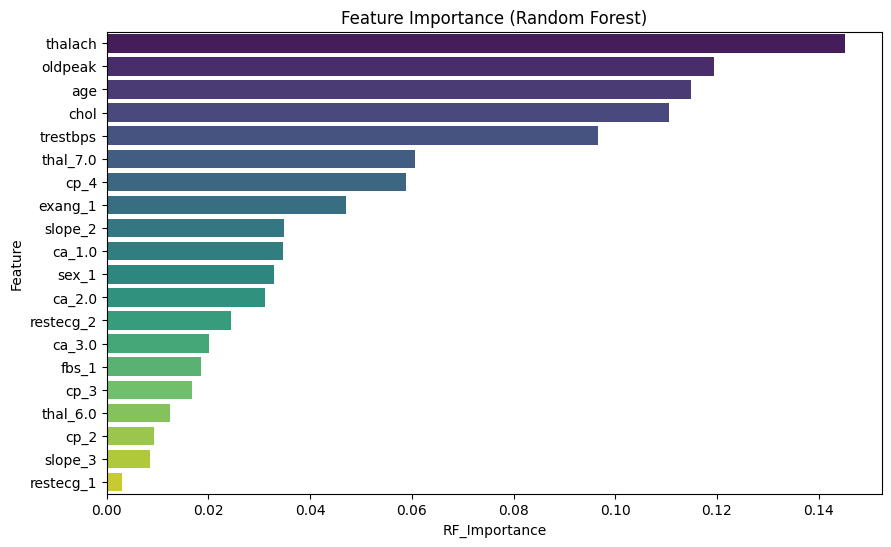


 Feature Selection Results (RF + RFE + Chi-Square):

  Feature  RF_Importance  RFE_Rank  Selected_by_RFE  Chi2_Score  Selected_by_Chi2
  oldpeak       0.119441         1             True   16.451213              True
 thal_7.0       0.060592         1             True   46.721875              True
     cp_4       0.058923         1             True   45.129615              True
  slope_2       0.034934         1             True   22.408432              True
   ca_1.0       0.034681         1             True   15.262296              True
   ca_2.0       0.031061         1             True   34.648382              True
   ca_3.0       0.020094         1             True   29.999871              True
restecg_2       0.024380         1             True    6.458947             False
    fbs_1       0.018563         1             True    6.658223             False
 thal_6.0       0.012417         1             True   10.943440             False
  exang_1       0.047135         3          

In [22]:
# 2.3 Feature Selection

%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np



# -----------------------------
# Step 0: Load preprocessed data
# -----------------------------
file_path = "heart_disease_processed.csv"   # update to your file path
df = pd.read_csv(file_path)

# Features & target
X = df.drop(columns=["num"])
y = df["num"]

# Scale features for Chi-Square
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# -----------------------------
# Step 1: Feature Importance (Random Forest)
# -----------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "RF_Importance": importances
}).sort_values(by="RF_Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x="RF_Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

# -----------------------------
# Step 2: Recursive Feature Elimination (RFE)
# -----------------------------
lr = LogisticRegression(max_iter=1000)
rfe = RFE(lr, n_features_to_select=10)  # keep top 10 features
rfe.fit(X, y)

selected_rfe = X.columns[rfe.support_]  # keep only top 10
rfe_ranking = pd.DataFrame({
    "Feature": X.columns,
    "RFE_Rank": rfe.ranking_
})
rfe_ranking["Selected_by_RFE"] = rfe_ranking["RFE_Rank"] == 1
# -----------------------------
# Step 3: Chi-Square Test
# -----------------------------
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_scaled, y)

chi2_scores = pd.DataFrame({
    "Feature": X.columns,
    "Chi2_Score": chi2_selector.scores_
})
chi2_scores["Selected_by_Chi2"] = chi2_scores["Feature"].isin(X.columns[chi2_selector.get_support()])

# -----------------------------
# Step 4: Merge All Results
# -----------------------------
feature_table = pd.merge(feature_importance_df, rfe_ranking, on="Feature")
feature_table = pd.merge(feature_table, chi2_scores, on="Feature")

# Sort for readability (show selected features first)
feature_table = feature_table.sort_values(
    ["Selected_by_RFE", "Selected_by_Chi2", "RF_Importance"],
    ascending=[False, False, False]
)

# Print final comparison table
print("\n Feature Selection Results (RF + RFE + Chi-Square):\n")
print(feature_table.to_string(index=False))

selected_features = list(set(selected_rfe).intersection(set(chi2_features)))
print("\n Final selected features (RFE ∩ Chi2):\n", selected_features)

X_reduced = X[selected_features]
reduced_df = pd.concat([X_reduced, y], axis=1)

# Save reduced dataset
reduced_df.to_csv("heart_disease_selected_features.csv", index=False)
print("\nReduced dataset saved as 'heart_disease_selected_features.csv'")


In [23]:
# 2.3 Feature Selection

%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [24]:
# -----------------------------
# Step 0: Load preprocessed data
# -----------------------------
file_path = "heart_disease_processed.csv"   # update to your file path
df = pd.read_csv(file_path)

# Features & target
X = df.drop(columns=["num"])
y = df["num"]

# Scale features for Chi-Square
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

C:\Users\Marim\AppData\Local\Temp\ipykernel_17592\693480047.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="RF_Importance", y="Feature", data=feature_importance_df, palette="viridis")


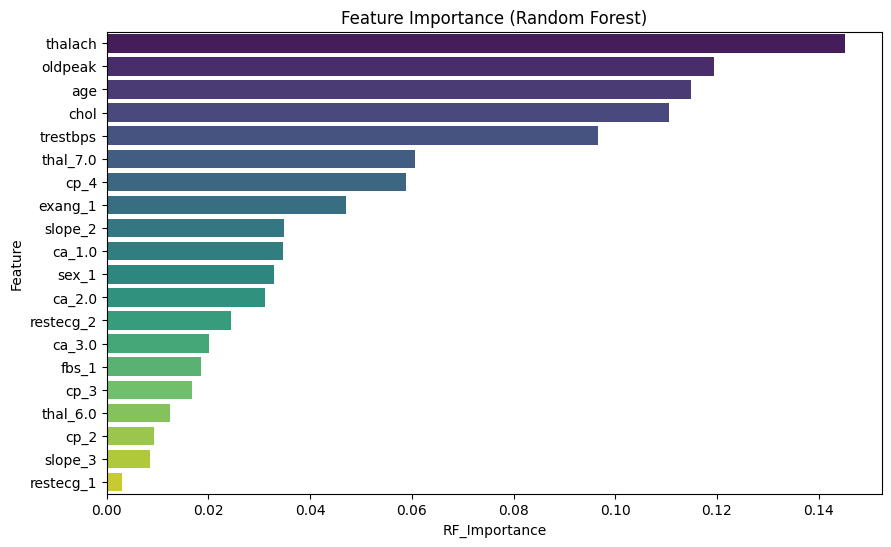

In [25]:
# -----------------------------
# Step 1: Feature Importance (Random Forest)
# -----------------------------
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "RF_Importance": importances
}).sort_values(by="RF_Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(x="RF_Importance", y="Feature", data=feature_importance_df, palette="viridis")
plt.title("Feature Importance (Random Forest)")
plt.show()

In [26]:
# -----------------------------
# Step 2: Recursive Feature Elimination (RFE)
# -----------------------------
lr = LogisticRegression(max_iter=1000)
rfe = RFE(lr, n_features_to_select=10)  # keep top 10 features
rfe.fit(X, y)

selected_rfe = X.columns[rfe.support_]  # keep only top 10
rfe_ranking = pd.DataFrame({
    "Feature": X.columns,
    "RFE_Rank": rfe.ranking_
})
rfe_ranking["Selected_by_RFE"] = rfe_ranking["RFE_Rank"] == 1

In [27]:
# -----------------------------
# Step 3: Chi-Square Test
# -----------------------------
chi2_selector = SelectKBest(score_func=chi2, k=10)
chi2_selector.fit(X_scaled, y)

chi2_scores = pd.DataFrame({
    "Feature": X.columns,
    "Chi2_Score": chi2_selector.scores_
})
chi2_scores["Selected_by_Chi2"] = chi2_scores["Feature"].isin(X.columns[chi2_selector.get_support()])


In [28]:
# -----------------------------
# Step 4: Merge All Results
# -----------------------------
feature_table = pd.merge(feature_importance_df, rfe_ranking, on="Feature")
feature_table = pd.merge(feature_table, chi2_scores, on="Feature")

# Sort for readability (show selected features first)
feature_table = feature_table.sort_values(
    ["Selected_by_RFE", "Selected_by_Chi2", "RF_Importance"],
    ascending=[False, False, False]
)

# Print final comparison table
print("\n Feature Selection Results (RF + RFE + Chi-Square):\n")
print(feature_table.to_string(index=False))

selected_features = list(set(selected_rfe).intersection(set(chi2_features)))
print("\n Final selected features (RFE ∩ Chi2):\n", selected_features)

X_reduced = X[selected_features]
reduced_df = pd.concat([X_reduced, y], axis=1)




 Feature Selection Results (RF + RFE + Chi-Square):

  Feature  RF_Importance  RFE_Rank  Selected_by_RFE  Chi2_Score  Selected_by_Chi2
  oldpeak       0.119441         1             True   16.451213              True
 thal_7.0       0.060592         1             True   46.721875              True
     cp_4       0.058923         1             True   45.129615              True
  slope_2       0.034934         1             True   22.408432              True
   ca_1.0       0.034681         1             True   15.262296              True
   ca_2.0       0.031061         1             True   34.648382              True
   ca_3.0       0.020094         1             True   29.999871              True
restecg_2       0.024380         1             True    6.458947             False
    fbs_1       0.018563         1             True    6.658223             False
 thal_6.0       0.012417         1             True   10.943440             False
  exang_1       0.047135         3          

In [29]:
# Save reduced dataset
reduced_df.to_csv("heart_disease_selected_features.csv", index=False)
print("\n✅ Reduced dataset saved as 'heart_disease_selected_features.csv'")


✅ Reduced dataset saved as 'heart_disease_selected_features.csv'
